![<caption>](UFPR.PNG)
    
    
IAA007 – Aprendizado de Máquina e Laboratório de IA    
**Prof. Dr. Jaime Wojciechowski**
    
Josué Leal Evangelista

### REGRESSÃO

#### DEFININDO DIRETÓRIO DE TRABALHO

In [3]:
# DESATIVAR MENSAGENS DE WARNINGS (warn = -1) E ATIVAR (warn = 0)
options(warn = -1)

In [4]:
setwd("C:/IAAUFPR/Aprendizado_de_Maquina/Datasets")
getwd()

[1] "C:/IAAUFPR/Aprendizado_de_Maquina/Datasets"

#### CARREGANDO BIBLIOTECAS

In [35]:
suppressPackageStartupMessages({
library(caret)
library(e1071)
library(data.table)
library(dplyr)
library(ggplot2)
library(cowplot)
library(tidyr)
library(randomForest)
})

### 1 - REGRESSÃO 

#### 1.1 - ADMISSÃO

**Dataset Admissão**

Variáveis:

Conjunto de dados de admissão na pós-graduação.

In [6]:
# CARREGANDO O DATASET ADIMISSÃO
dados_admissao <- fread("Material 02 - 8 – R - Admissao - Dados.csv")
df_admissao <- as.data.frame(dados_admissao)

In [7]:
head(df_admissao, 5)

Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit
1,337,118,4,4.5,4.5,9.65,1,0.92
2,324,107,4,4.0,4.5,8.87,1,0.76
3,316,104,3,3.0,3.5,8.00,1,0.72
4,322,110,3,3.5,2.5,8.67,1,0.80
5,314,103,2,2.0,3.0,8.21,0,0.65


In [8]:
# EXISTE VALORES NA?
any(is.na(df_admissao))

[1] FALSE

In [9]:
# EXISTE VALORES NULL?
any(is.null(df_admissao))

[1] FALSE

In [10]:
# FILTRO PARA RETIRAR A COLUNA Serial No.
df_admissao <- df_admissao[, c(2:9)]

In [11]:
# REMOVENDO O ESPAÇO DOS NOMES
names(df_admissao) <- c("GRE_Score","TOEFL_Score","University_Rating","SOP","LOR","CGPA","Research","ChanceOfAdmit")

In [12]:
df_admissao$University_Rating <- as.factor(df_admissao$University_Rating)
df_admissao$Research <- as.factor(df_admissao$Research)

In [13]:
set.seed(1971)

In [14]:
# DIVIDINDO DADOS TREINO E TESTE 80% e 20%
indices <- createDataPartition(df_admissao$ChanceOfAdmit, p = 0.8, list = FALSE)
dados_treino <- df_admissao[indices,]
dados_teste <- df_admissao[-indices,]

In [15]:
str(dados_treino)
str(dados_teste)

'data.frame':	402 obs. of  8 variables:
 $ GRE_Score        : int  337 324 316 322 314 330 321 308 302 327 ...
 $ TOEFL_Score      : int  118 107 104 110 103 115 109 101 102 111 ...
 $ University_Rating: Factor w/ 5 levels "1","2","3","4",..: 4 4 3 3 2 5 3 2 1 4 ...
 $ SOP              : num  4.5 4 3 3.5 2 4.5 3 3 2 4 ...
 $ LOR              : num  4.5 4.5 3.5 2.5 3 3 4 4 1.5 4.5 ...
 $ CGPA             : num  9.65 8.87 8 8.67 8.21 9.34 8.2 7.9 8 9 ...
 $ Research         : Factor w/ 2 levels "0","1": 2 2 2 2 1 2 2 1 1 2 ...
 $ ChanceOfAdmit    : num  0.92 0.76 0.72 0.8 0.65 0.9 0.75 0.68 0.5 0.84 ...
'data.frame':	98 obs. of  8 variables:
 $ GRE_Score        : int  323 325 319 300 338 331 320 299 300 332 ...
 $ TOEFL_Score      : int  108 106 106 97 118 112 110 106 105 117 ...
 $ University_Rating: Factor w/ 5 levels "1","2","3","4",..: 3 3 3 2 4 5 5 2 1 4 ...
 $ SOP              : num  3.5 3.5 4 3 3 4 5 4 1 4.5 ...
 $ LOR              : num  3 4 3 3 4.5 5 5 4 2 4 ...
 $ CGPA         

In [16]:
# NORMALIZAÇÃO 
# method = c("center","scale") -> Padronização fórmula do score z
# method = c("range") -> Normalização fórmula do min-max

# TREINO
transforma1  <- preProcess(dados_treino[,c(1:2, 4:6)], method = c("range"))
dados_treino_normalizado <- predict(transforma1, dados_treino)

# TESTE
transforma2  <- preProcess(dados_teste[,c(1:2, 4:6)], method = c("range"))
dados_teste_normalizado <- predict(transforma2, dados_teste)

In [17]:
glimpse(dados_treino_normalizado)
glimpse(dados_teste_normalizado)

Rows: 402
Columns: 8
$ GRE_Score         <dbl> 0.94, 0.68, 0.52, 0.64, 0.48, 0.80, 0.62, 0.36, 0.24~
$ TOEFL_Score       <dbl> 0.92857143, 0.53571429, 0.42857143, 0.64285714, 0.39~
$ University_Rating <fct> 4, 4, 3, 3, 2, 5, 3, 2, 1, 4, 4, 3, 3, 3, 3, 3, 3, 3~
$ SOP               <dbl> 0.875, 0.750, 0.500, 0.625, 0.250, 0.875, 0.500, 0.5~
$ LOR               <dbl> 0.875, 0.875, 0.625, 0.375, 0.500, 0.500, 0.750, 0.7~
$ CGPA              <dbl> 0.9134615, 0.6634615, 0.3846154, 0.5993590, 0.451923~
$ Research          <fct> 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1~
$ ChanceOfAdmit     <dbl> 0.92, 0.76, 0.72, 0.80, 0.65, 0.90, 0.75, 0.68, 0.50~
Rows: 98
Columns: 8
$ GRE_Score         <dbl> 0.63829787, 0.68085106, 0.55319149, 0.14893617, 0.95~
$ TOEFL_Score       <dbl> 0.52, 0.44, 0.44, 0.08, 0.92, 0.68, 0.60, 0.44, 0.40~
$ University_Rating <fct> 3, 3, 3, 2, 4, 5, 5, 2, 1, 4, 5, 5, 4, 3, 2, 4, 4, 5~
$ SOP               <dbl> 0.625, 0.625, 0.750, 0.500, 0.500, 0.750, 1.000, 0.7~

### 1.1 - REDES NEURAIS ARTIFICIAIS - RNA

#### APRENDIZADO - MODELO RNA - HOLD-OUT

In [18]:
modelo_rna <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                    dados_treino_normalizado, 
                    method = "nnet", 
                    linout = TRUE, 
                    trace = FALSE)
modelo_rna

Neural Network 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  size  decay  RMSE        Rsquared   MAE       
  1     0e+00  0.08036932  0.7389276  0.06108676
  1     1e-04  0.07114262  0.7317347  0.05320575
  1     1e-01  0.06066506  0.8123262  0.04437395
  3     0e+00  0.06455637  0.7879741  0.04600406
  3     1e-04  0.06355323  0.7943048  0.04568502
  3     1e-01  0.06045839  0.8133557  0.04416097
  5     0e+00  0.06817908  0.7677240  0.04897709
  5     1e-04  0.06955978  0.7607019  0.04962323
  5     1e-01  0.06049250  0.8131986  0.04421021

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 3 and decay = 0.1.

In [42]:
previsao_rna <- predict(modelo_rna, dados_teste_normalizado)

In [43]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_rna < 0)

[1] FALSE

In [44]:
resultado_admissao1 <- cbind(dados_teste_normalizado, previsao_rna)
resultado_admissao1 <- resultado_admissao1 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_rna)/ChanceOfAdmit)*100)

head(resultado_admissao1, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_rna,Residuo_Percentual
10,0.6382979,0.52,3,0.625,0.4285714,0.5148148,0,0.45,0.6966482,-54.8107011
11,0.6808511,0.44,3,0.625,0.7142857,0.4407407,1,0.52,0.7135037,-37.2122433
18,0.5531915,0.44,3,0.750,0.4285714,0.2925926,1,0.65,0.6382520,1.8073875
31,0.1489362,0.08,2,0.500,0.4285714,0.3296296,1,0.65,0.5395381,16.9941387
33,0.9574468,0.92,4,0.500,0.8571429,0.8111111,1,0.91,0.9003243,1.0632690
35,0.8085106,0.68,5,0.750,1.0000000,0.9592593,1,0.94,0.9367242,0.3484899
36,0.5744681,0.60,5,1.000,1.0000000,0.7370370,1,0.88,0.8545421,2.8929443
37,0.1276596,0.44,2,0.750,0.7142857,0.4407407,0,0.64,0.6147539,3.9447008
38,0.1489362,0.40,1,0.000,0.1428571,0.2185185,0,0.58,0.5009168,13.6350323
44,0.8297872,0.88,4,0.875,0.7142857,0.7000000,0,0.87,0.8338607,4.1539395


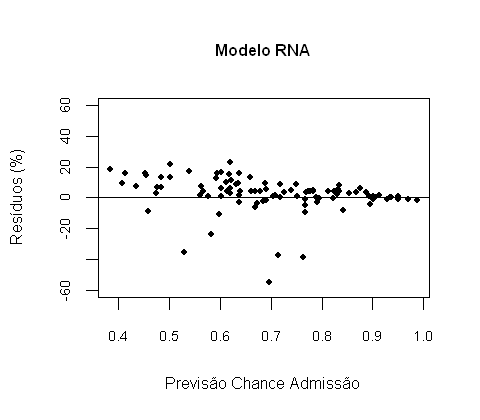

In [71]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao1$previsao_rna, resultado_admissao1$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo RNA", xlab = "Previsto", ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO RNA - HOLD-OUT

In [53]:
# FUNÇÃO DE MÉTRICAS
metricas <- function(observado, previsto, num_observacoes, num_variaveis_independentes_modelo){
    
    R2 <- round(1 - (sum((observado - previsto)^2)/sum((observado - mean(observado))^2)), 4)
    
    syx <- round(sqrt((sum(((observado - previsto)^2))/(num_observacoes - num_variaveis_independentes_modelo))),4)
    
    numerador <- sum((observado - mean(observado))*(previsto - mean(previsto)))
    denominador <- (sqrt((sum((observado - mean(observado))^2))))*(sqrt((sum((previsto - mean(previsto))^2))))               
    pearson <- round(numerador/denominador, 4)
    
    RMSE <- round(sqrt(sum((observado - previsto)^2)/num_observacoes), 4)
    
    MAE <- round(sum(abs(observado - previsto))/num_observacoes, 4) 
    
    return(cat("Resultados do teste do Modelo:\n\nR²      = ", 
               R2,"\nSyx     = ", syx,"\nPearson = ", pearson,"\nRMSE    = ", RMSE,"\nMAE     = ", MAE))
}

In [56]:
metricas(resultado_admissao1$ChanceOfAdmit, resultado_admissao1$previsao_rna, nrow(dados_teste_normalizado), 7)

Resultados do teste do Modelo:

R²      =  0.7818 
Syx     =  0.0706 
Pearson =  0.9017 
RMSE    =  0.0681 
MAE     =  0.0485

#### APRENDIZADO - MODELO RNA - CROSS VALIDATION

In [60]:
crossvalidation1 <- trainControl(method = "cv", number = 10)
modelo_rna_cv <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                       dados_treino_normalizado, 
                       trainControl = crossvalidation1, 
                       method = "nnet", 
                       linout = TRUE, 
                       trace = FALSE)
modelo_rna_cv

Neural Network 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  size  decay  RMSE        Rsquared   MAE       
  1     0e+00  0.08633853  0.6643690  0.06553259
  1     1e-04  0.06781196  0.7616692  0.05031082
  1     1e-01  0.06183714  0.8060368  0.04538265
  3     0e+00  0.07359776  0.7054022  0.05465723
  3     1e-04  0.06415407  0.7936417  0.04609854
  3     1e-01  0.06166002  0.8070659  0.04522022
  5     0e+00  0.06840958  0.7699091  0.04966604
  5     1e-04  0.06796728  0.7707349  0.04938346
  5     1e-01  0.06163058  0.8072226  0.04522787

RMSE was used to select the optimal model using the smallest value.
The final values used for the model were size = 5 and decay = 0.1.

In [74]:
previsao_rna_cv <- predict(modelo_rna_cv, dados_teste_normalizado)

In [75]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_rna_cv < 0)

[1] FALSE

In [76]:
resultado_admissao2 <- cbind(dados_teste_normalizado, previsao_rna_cv)
resultado_admissao2 <- resultado_admissao2 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_rna_cv)/ChanceOfAdmit)*100)

head(resultado_admissao2, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_rna_cv,Residuo_Percentual
10,0.6382979,0.52,3,0.625,0.4285714,0.5148148,0,0.45,0.6975592,-55.0131654
11,0.6808511,0.44,3,0.625,0.7142857,0.4407407,1,0.52,0.7144954,-37.4029576
18,0.5531915,0.44,3,0.750,0.4285714,0.2925926,1,0.65,0.6392306,1.6568311
31,0.1489362,0.08,2,0.500,0.4285714,0.3296296,1,0.65,0.5401861,16.8944533
33,0.9574468,0.92,4,0.500,0.8571429,0.8111111,1,0.91,0.9019214,0.8877602
35,0.8085106,0.68,5,0.750,1.0000000,0.9592593,1,0.94,0.9379480,0.2182962
36,0.5744681,0.60,5,1.000,1.0000000,0.7370370,1,0.88,0.8554953,2.7846214
37,0.1276596,0.44,2,0.750,0.7142857,0.4407407,0,0.64,0.6164034,3.6869687
38,0.1489362,0.40,1,0.000,0.1428571,0.2185185,0,0.58,0.5004456,13.7162737
44,0.8297872,0.88,4,0.875,0.7142857,0.7000000,0,0.87,0.8351144,4.0098358


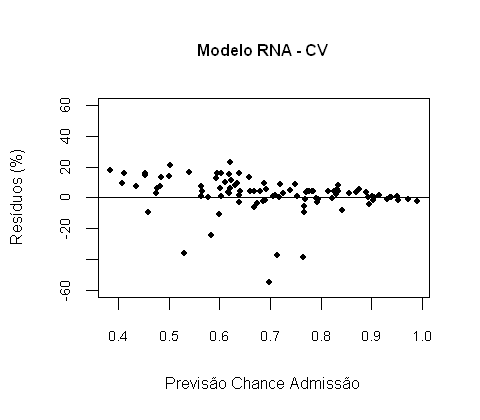

In [80]:
# GRÁFICO DE RESÍDUOS
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao2$previsao_rna_cv, resultado_admissao2$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo RNA - CV", 
     xlab = "Previsto", 
     ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO RNA - CROSSVALIDATION

In [78]:
metricas(resultado_admissao2$ChanceOfAdmit, resultado_admissao2$previsao_rna_cv, nrow(dados_teste_normalizado), 7)

Resultados do teste do Modelo:

R²      =  0.7828 
Syx     =  0.0705 
Pearson =  0.9016 
RMSE    =  0.0679 
MAE     =  0.0482

#### APRENDIZADO - MELHOR MODELO RNA - CROSS VALIDATION E TUNEGRID

In [83]:
tunegrid1 <- expand.grid(size = seq(from = 1, to = 10, by = 1), decay = seq(from = 0.1, to = 0.9, by = 0.1))
modelo_rna_best <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                         dados_treino_normalizado, 
                         method = "nnet", 
                         trainControl = crossvalidation1,
                         tuneGrid = tunegrid1, 
                         MaxNWts = 10000, 
                         maxit = 2000, 
                         linout = TRUE, 
                         trace = FALSE)
modelo_rna_best

Neural Network 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  size  decay  RMSE        Rsquared   MAE       
   1    0.1    0.06059203  0.8109135  0.04436234
   1    0.2    0.06152757  0.8069345  0.04534323
   1    0.3    0.06277161  0.8019228  0.04671130
   1    0.4    0.06398343  0.7969130  0.04788683
   1    0.5    0.06555898  0.7905889  0.04950241
   1    0.6    0.06693467  0.7850117  0.05080600
   1    0.7    0.06849360  0.7787654  0.05226780
   1    0.8    0.06964907  0.7738828  0.05328776
   1    0.9    0.07130236  0.7673532  0.05479352
   2    0.1    0.06045903  0.8116626  0.04422113
   2    0.2    0.06132466  0.8078643  0.04512712
   2    0.3    0.06228881  0.8036159  0.04609879
   2    0.4    0.06348532  0.7984981  0.04734425
   2    0.5    0.06459047  0.7939825  0.04843574
   2    0.6    0.06577909  0.7893037  0.04960405
   2    0.7 

In [85]:
previsao_rna_best <- predict(modelo_rna_best, dados_teste_normalizado)

In [89]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_rna_best < 0)

[1] FALSE

In [87]:
resultado_admissao3 <- cbind(dados_teste_normalizado, previsao_rna_best)
resultado_admissao3 <- resultado_admissao3 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_rna_best)/ChanceOfAdmit)*100)

head(resultado_admissao3, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_rna_best,Residuo_Percentual
10,0.6382979,0.52,3,0.625,0.4285714,0.5148148,0,0.45,0.6966491,-54.810908
11,0.6808511,0.44,3,0.625,0.7142857,0.4407407,1,0.52,0.7135046,-37.212424
18,0.5531915,0.44,3,0.750,0.4285714,0.2925926,1,0.65,0.6382541,1.807069
31,0.1489362,0.08,2,0.500,0.4285714,0.3296296,1,0.65,0.5395388,16.994030
33,0.9574468,0.92,4,0.500,0.8571429,0.8111111,1,0.91,0.9003239,1.063311
35,0.8085106,0.68,5,0.750,1.0000000,0.9592593,1,0.94,0.9367208,0.348852
36,0.5744681,0.60,5,1.000,1.0000000,0.7370370,1,0.88,0.8545404,2.893140
37,0.1276596,0.44,2,0.750,0.7142857,0.4407407,0,0.64,0.6147557,3.944415
38,0.1489362,0.40,1,0.000,0.1428571,0.2185185,0,0.58,0.5009172,13.634969
44,0.8297872,0.88,4,0.875,0.7142857,0.7000000,0,0.87,0.8338608,4.153926


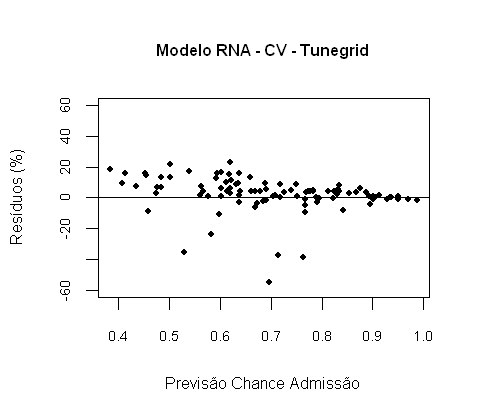

In [92]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao3$previsao_rna_best, resultado_admissao3$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo RNA - CV - Tunegrid", 
     xlab = "Previsto", 
     ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MELHOR MODELO RNA - CROSS VALIDATION E TUNEGRID

In [95]:
metricas(resultado_admissao3$ChanceOfAdmit, resultado_admissao3$previsao_rna_best, nrow(dados_teste_normalizado), 7)

Resultados do teste do Modelo:

R²      =  0.7818 
Syx     =  0.0706 
Pearson =  0.9017 
RMSE    =  0.0681 
MAE     =  0.0485

### 1.2 - K-NEAREST NEIGHBOR - KNN

#### APRENDIZADO - MODELO KNN - TUNEGRID

In [97]:
tunegrid2 <- expand.grid(k = c(3, 5, 7, 9))

In [100]:
modelo_knn <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                    dados_treino_normalizado, 
                    method = "knn", 
                    tuneGrid = tunegrid2)
modelo_knn

k-Nearest Neighbors 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  k  RMSE        Rsquared   MAE       
  3  0.08168596  0.6711854  0.05857683
  5  0.07940422  0.6865597  0.05683129
  7  0.07907870  0.6889059  0.05676087
  9  0.07963318  0.6847108  0.05698349

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was k = 7.

In [104]:
previsao_knn <-predict(modelo_knn, dados_teste_normalizado)

In [105]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_knn < 0)

[1] FALSE

In [106]:
resultado_admissao4 <- cbind(dados_teste_normalizado, previsao_knn)
resultado_admissao4 <- resultado_admissao4 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_knn)/ChanceOfAdmit)*100)

head(resultado_admissao4, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_knn,Residuo_Percentual
10,0.6382979,0.52,3,0.625,0.4285714,0.5148148,0,0.45,0.6728571,-49.5238095
11,0.6808511,0.44,3,0.625,0.7142857,0.4407407,1,0.52,0.7357143,-41.4835165
18,0.5531915,0.44,3,0.750,0.4285714,0.2925926,1,0.65,0.6857143,-5.4945055
31,0.1489362,0.08,2,0.500,0.4285714,0.3296296,1,0.65,0.5657143,12.9670330
33,0.9574468,0.92,4,0.500,0.8571429,0.8111111,1,0.91,0.9071429,0.3139717
35,0.8085106,0.68,5,0.750,1.0000000,0.9592593,1,0.94,0.9085714,3.3434650
36,0.5744681,0.60,5,1.000,1.0000000,0.7370370,1,0.88,0.8885714,-0.9740260
37,0.1276596,0.44,2,0.750,0.7142857,0.4407407,0,0.64,0.5771429,9.8214286
38,0.1489362,0.40,1,0.000,0.1428571,0.2185185,0,0.58,0.5000000,13.7931034
44,0.8297872,0.88,4,0.875,0.7142857,0.7000000,0,0.87,0.7757143,10.8374384


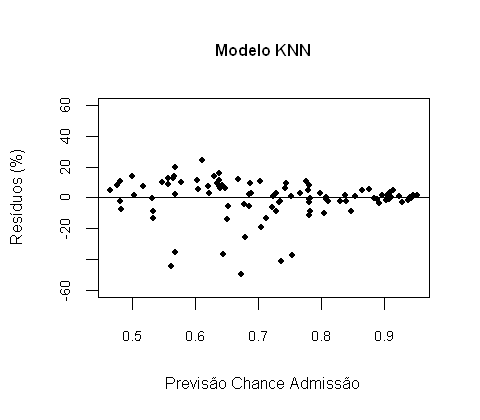

In [107]:
# GRÁFICO DE RESÍDUOS
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao4$previsao_knn, resultado_admissao4$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo KNN", 
     xlab = "Previsto", 
     ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO KNN - TUNEGRID

In [108]:
metricas(resultado_admissao4$ChanceOfAdmit, resultado_admissao4$previsao_knn, nrow(dados_teste_normalizado), 7)

Resultados do teste do Modelo:

R²      =  0.7477 
Syx     =  0.0759 
Pearson =  0.8674 
RMSE    =  0.0732 
MAE     =  0.0529

### 1.3 - SUPPORT VECTOR MACHINE - SVM

#### APRENDIZADO - MODELO SVM - HOLD-OUT

In [110]:
modelo_svm <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                    dados_treino_normalizado, 
                    method = "svmRadial")
modelo_svm

Support Vector Machines with Radial Basis Function Kernel 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  C     RMSE        Rsquared   MAE       
  0.25  0.06547294  0.7909866  0.04676761
  0.50  0.06428198  0.7945694  0.04617183
  1.00  0.06422176  0.7932012  0.04622565

Tuning parameter 'sigma' was held constant at a value of 0.0980106
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.0980106 and C = 1.

In [114]:
previsao_svm <- predict(modelo_svm, dados_teste_normalizado)

In [115]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_svm < 0)

[1] FALSE

In [116]:
resultado_admissao5 <- cbind(dados_teste_normalizado, previsao_svm)
resultado_admissao5 <- resultado_admissao5 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_svm)/ChanceOfAdmit)*100)

head(resultado_admissao5, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_svm,Residuo_Percentual
10,0.6382979,0.52,3,0.625,0.4285714,0.5148148,0,0.45,0.6833631,-51.8584720
11,0.6808511,0.44,3,0.625,0.7142857,0.4407407,1,0.52,0.7264904,-39.7096860
18,0.5531915,0.44,3,0.750,0.4285714,0.2925926,1,0.65,0.6319277,2.7803471
31,0.1489362,0.08,2,0.500,0.4285714,0.3296296,1,0.65,0.5337435,17.8856184
33,0.9574468,0.92,4,0.500,0.8571429,0.8111111,1,0.91,0.8780823,3.5074374
35,0.8085106,0.68,5,0.750,1.0000000,0.9592593,1,0.94,0.9304676,1.0140802
36,0.5744681,0.60,5,1.000,1.0000000,0.7370370,1,0.88,0.8720373,0.9048556
37,0.1276596,0.44,2,0.750,0.7142857,0.4407407,0,0.64,0.6321403,1.2280709
38,0.1489362,0.40,1,0.000,0.1428571,0.2185185,0,0.58,0.4896425,15.5788711
44,0.8297872,0.88,4,0.875,0.7142857,0.7000000,0,0.87,0.8200811,5.7378056


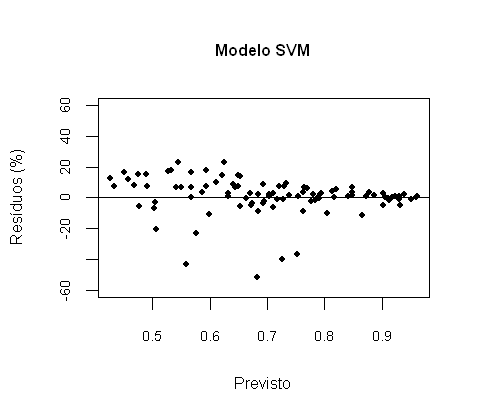

In [117]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao5$previsao_svm, resultado_admissao5$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo SVM", xlab = "Previsto", ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO SVM - HOLD-OUT

In [118]:
metricas(resultado_admissao5$ChanceOfAdmit, resultado_admissao5$previsao_svm, nrow(dados_teste_normalizado), 7)

Resultados do teste do Modelo:

R²      =  0.7752 
Syx     =  0.0717 
Pearson =  0.8907 
RMSE    =  0.0691 
MAE     =  0.0485

#### APRENDIZADO - MODELO SVM - CROSS VALIDATION

In [120]:
crossvalidation2 <- trainControl(method = "cv", number = 10)
modelo_svm_cv <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                       dados_treino_normalizado, 
                       trainControl = crossvalidation2, 
                       method = "svmRadial")
modelo_svm_cv

Support Vector Machines with Radial Basis Function Kernel 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  C     RMSE        Rsquared   MAE       
  0.25  0.06675292  0.7772193  0.04758211
  0.50  0.06589114  0.7784378  0.04708049
  1.00  0.06650323  0.7726783  0.04746550

Tuning parameter 'sigma' was held constant at a value of 0.114082
RMSE was used to select the optimal model using the smallest value.
The final values used for the model were sigma = 0.114082 and C = 0.5.

In [123]:
previsao_svm_cv <- predict(modelo_svm_cv, dados_teste_normalizado)

In [124]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_svm_cv < 0)

[1] FALSE

In [126]:
resultado_admissao6 <- cbind(dados_teste_normalizado, previsao_svm_cv)
resultado_admissao6 <- resultado_admissao6 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_svm_cv)/ChanceOfAdmit)*100)

head(resultado_admissao6, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_svm_cv,Residuo_Percentual
10,0.6382979,0.52,3,0.625,0.4285714,0.5148148,0,0.45,0.6904331,-53.4295669
11,0.6808511,0.44,3,0.625,0.7142857,0.4407407,1,0.52,0.7221966,-38.8839711
18,0.5531915,0.44,3,0.750,0.4285714,0.2925926,1,0.65,0.6415883,1.2941138
31,0.1489362,0.08,2,0.500,0.4285714,0.3296296,1,0.65,0.5665009,12.8460096
33,0.9574468,0.92,4,0.500,0.8571429,0.8111111,1,0.91,0.8701498,4.3791483
35,0.8085106,0.68,5,0.750,1.0000000,0.9592593,1,0.94,0.9233333,1.7730486
36,0.5744681,0.60,5,1.000,1.0000000,0.7370370,1,0.88,0.8669355,1.4845988
37,0.1276596,0.44,2,0.750,0.7142857,0.4407407,0,0.64,0.6451557,-0.8055734
38,0.1489362,0.40,1,0.000,0.1428571,0.2185185,0,0.58,0.5150587,11.1967751
44,0.8297872,0.88,4,0.875,0.7142857,0.7000000,0,0.87,0.8264749,5.0028892


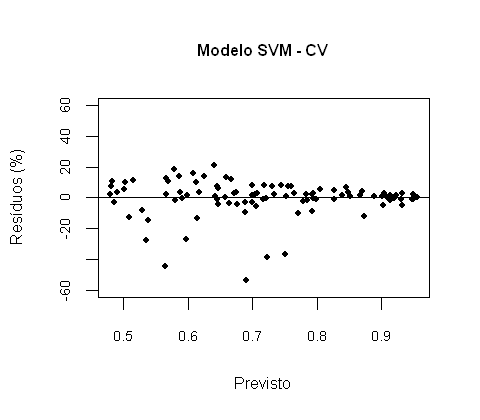

In [127]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao6$previsao_svm_cv, resultado_admissao6$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo SVM - CV", xlab = "Previsto", ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO SVM - CROSS VALIDATION

In [128]:
metricas(resultado_admissao6$ChanceOfAdmit, resultado_admissao6$previsao_svm_cv, nrow(dados_teste_normalizado), 7)

Resultados do teste do Modelo:

R²      =  0.7976 
Syx     =  0.068 
Pearson =  0.8944 
RMSE    =  0.0655 
MAE     =  0.0455

#### APRENDIZADO - MODELO SVM - CROSS VALIDATION E TUNEGRID

In [131]:
tunegrid2 <- expand.grid(C = c(1, 2, 10, 50, 100), sigma = c(0.01, 0.015, 0.2))
modelo_svm_best <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                         dados_treino_normalizado, 
                         method = "svmRadial", 
                         trainControl = crossvalidation2,
                         tuneGrid = tunegrid2)
modelo_svm_best

Support Vector Machines with Radial Basis Function Kernel 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  C    sigma  RMSE        Rsquared   MAE       
    1  0.010  0.06122830  0.8201904  0.04300789
    1  0.015  0.06130435  0.8185779  0.04318185
    1  0.200  0.06928212  0.7643525  0.04996281
    2  0.010  0.06088832  0.8203428  0.04287797
    2  0.015  0.06122234  0.8175262  0.04320196
    2  0.200  0.07021466  0.7558257  0.05045784
   10  0.010  0.06145527  0.8148365  0.04350260
   10  0.015  0.06243446  0.8080862  0.04422652
   10  0.200  0.07764853  0.7058197  0.05553979
   50  0.010  0.06338448  0.8013653  0.04491307
   50  0.015  0.06464490  0.7934272  0.04558192
   50  0.200  0.09110070  0.6227253  0.06444501
  100  0.010  0.06434272  0.7950683  0.04551418
  100  0.015  0.06562950  0.7870365  0.04633605
  100  0.200  0.09912010  0.57679

In [132]:
previsao_svm_best <- predict(modelo_svm_best, dados_teste_normalizado)

In [133]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_svm_best < 0)

[1] FALSE

In [134]:
resultado_admissao7 <- cbind(dados_teste_normalizado, previsao_svm_best)
resultado_admissao7 <- resultado_admissao7 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_svm_best)/ChanceOfAdmit)*100)

head(resultado_admissao7, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_svm_best,Residuo_Percentual
10,0.6382979,0.52,3,0.625,0.4285714,0.5148148,0,0.45,0.7037682,-56.3929364
11,0.6808511,0.44,3,0.625,0.7142857,0.4407407,1,0.52,0.7157515,-37.6445246
18,0.5531915,0.44,3,0.750,0.4285714,0.2925926,1,0.65,0.6381436,1.8240553
31,0.1489362,0.08,2,0.500,0.4285714,0.3296296,1,0.65,0.5456880,16.0480064
33,0.9574468,0.92,4,0.500,0.8571429,0.8111111,1,0.91,0.9050360,0.5454907
35,0.8085106,0.68,5,0.750,1.0000000,0.9592593,1,0.94,0.9373570,0.2811742
36,0.5744681,0.60,5,1.000,1.0000000,0.7370370,1,0.88,0.8619329,2.0530811
37,0.1276596,0.44,2,0.750,0.7142857,0.4407407,0,0.64,0.6339243,0.9493309
38,0.1489362,0.40,1,0.000,0.1428571,0.2185185,0,0.58,0.5067285,12.6330257
44,0.8297872,0.88,4,0.875,0.7142857,0.7000000,0,0.87,0.8354155,3.9752278


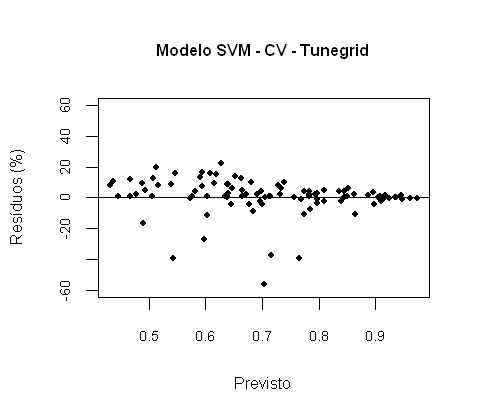

In [135]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao7$previsao_svm_best, resultado_admissao7$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo SVM - CV - Tunegrid", xlab = "Previsto", ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO SVM - CROSS VALIDATION E TUNEGRID

In [136]:
metricas(resultado_admissao7$ChanceOfAdmit, resultado_admissao7$previsao_svm_best, nrow(dados_teste_normalizado), 7)

Resultados do teste do Modelo:

R²      =  0.7962 
Syx     =  0.0683 
Pearson =  0.8995 
RMSE    =  0.0658 
MAE     =  0.0439

### 1.4 - RANDOM FOREST 

#### APRENDIZADO - MODELO RANDOM FOREST - HOLD-OUT

In [138]:
modelo_rf <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                   dados_treino, 
                   method = "rf")
modelo_rf

Random Forest 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  mtry  RMSE        Rsquared   MAE       
   2    0.06264237  0.8046394  0.04506885
   6    0.06391549  0.7943483  0.04575879
  10    0.06580307  0.7824803  0.04729898

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.

In [139]:
previsao_rf <- predict(modelo_rf, dados_teste)

In [140]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_rf < 0)

[1] FALSE

In [141]:
resultado_admissao8 <- cbind(dados_teste, previsao_rf)
resultado_admissao8 <- resultado_admissao8 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_rf)/ChanceOfAdmit)*100)

head(resultado_admissao8, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_rf,Residuo_Percentual
10,323,108,3,3.5,3.0,8.6,0,0.45,0.7098146,-57.736583
11,325,106,3,3.5,4.0,8.4,1,0.52,0.7423191,-42.753678
18,319,106,3,4.0,3.0,8.0,1,0.65,0.6744073,-3.754963
31,300,97,2,3.0,3.0,8.1,1,0.65,0.5662018,12.892029
33,338,118,4,3.0,4.5,9.4,1,0.91,0.8654247,4.898390
35,331,112,5,4.0,5.0,9.8,1,0.94,0.9195636,2.174085
36,320,110,5,5.0,5.0,9.2,1,0.88,0.8902801,-1.168198
37,299,106,2,4.0,4.0,8.4,0,0.64,0.6278559,1.897513
38,300,105,1,1.0,2.0,7.8,0,0.58,0.5392839,7.020026
44,332,117,4,4.5,4.0,9.1,0,0.87,0.8560949,1.598291


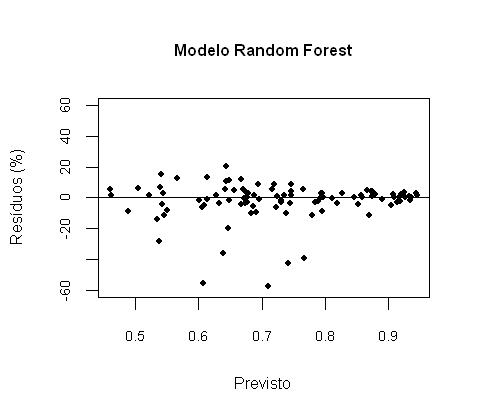

In [142]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao8$previsao_rf, resultado_admissao8$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo Random Forest", xlab = "Previsto", ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO RANDOM FOREST - HOLD-OUT

In [143]:
metricas(resultado_admissao8$ChanceOfAdmit, resultado_admissao8$previsao_rf, nrow(dados_teste), 7)

Resultados do teste do Modelo:

R²      =  0.7894 
Syx     =  0.0694 
Pearson =  0.8902 
RMSE    =  0.0669 
MAE     =  0.0439

#### APRENDIZADO - MODELO RANDOM FOREST - CROSS VALIDATION

In [145]:
crossvalidation3 <- trainControl(method = "cv", number = 10)
modelo_rf_cv <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                      dados_treino, 
                      trainControl = crossvalidation3, 
                      method = "rf")
modelo_rf_cv

Random Forest 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  mtry  RMSE        Rsquared   MAE       
   2    0.06359685  0.7941467  0.04573639
   6    0.06416310  0.7894347  0.04614473
  10    0.06617870  0.7764086  0.04767413

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 2.

In [146]:
previsao_rf_cv <- predict(modelo_rf_cv, dados_teste)

In [147]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_rf_cv < 0)

[1] FALSE

In [148]:
resultado_admissao9 <- cbind(dados_teste, previsao_rf_cv)
resultado_admissao9 <- resultado_admissao9 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_rf_cv)/ChanceOfAdmit)*100)

head(resultado_admissao9, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_rf_cv,Residuo_Percentual
10,323,108,3,3.5,3.0,8.6,0,0.45,0.7074967,-57.2214851
11,325,106,3,3.5,4.0,8.4,1,0.52,0.7410791,-42.5152175
18,319,106,3,4.0,3.0,8.0,1,0.65,0.6699067,-3.0625746
31,300,97,2,3.0,3.0,8.1,1,0.65,0.5681446,12.5931358
33,338,118,4,3.0,4.5,9.4,1,0.91,0.8668488,4.7418848
35,331,112,5,4.0,5.0,9.8,1,0.94,0.9184287,2.2948216
36,320,110,5,5.0,5.0,9.2,1,0.88,0.8885583,-0.9725382
37,299,106,2,4.0,4.0,8.4,0,0.64,0.6246005,2.4061748
38,300,105,1,1.0,2.0,7.8,0,0.58,0.5524413,4.7514975
44,332,117,4,4.5,4.0,9.1,0,0.87,0.8584544,1.3270862


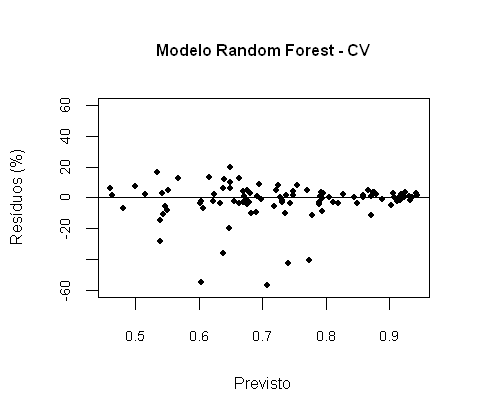

In [149]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao9$previsao_rf_cv, resultado_admissao9$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main = "Modelo Random Forest - CV", xlab = "Previsto", ylab = "Resíduos (%)")
abline(h = 0)

#### MÉTRICAS - MODELO RANDOM FOREST - CROSS VALIDATION

In [150]:
metricas(resultado_admissao9$ChanceOfAdmit, resultado_admissao9$previsao_rf_cv, nrow(dados_teste), 7)

Resultados do teste do Modelo:

R²      =  0.7915 
Syx     =  0.069 
Pearson =  0.8913 
RMSE    =  0.0665 
MAE     =  0.0437

#### APRENDIZADO - MODELO RANDOM FOREST - CROSS VALIDATION E TUNEGRID

In [152]:
tunegrid3 <- expand.grid(mtry = c(2, 4, 7, 9, 12, 15, 19))
modelo_rf_best <- train(ChanceOfAdmit ~ CGPA  + GRE_Score + TOEFL_Score + SOP + University_Rating + LOR + Research, 
                        dados_treino, 
                        method = "rf", 
                        trainControl = crossvalidation3,
                        tuneGrid = tunegrid3)
modelo_rf_best

Random Forest 

402 samples
  7 predictor

No pre-processing
Resampling: Bootstrapped (25 reps) 
Summary of sample sizes: 402, 402, 402, 402, 402, 402, ... 
Resampling results across tuning parameters:

  mtry  RMSE        Rsquared   MAE       
   2    0.06308239  0.8004982  0.04547653
   4    0.06290008  0.8000677  0.04518454
   7    0.06436733  0.7906498  0.04639253
   9    0.06517741  0.7855602  0.04698434
  12    0.06582880  0.7812653  0.04748682
  15    0.06571785  0.7819951  0.04742207
  19    0.06568565  0.7821388  0.04735510

RMSE was used to select the optimal model using the smallest value.
The final value used for the model was mtry = 4.

In [153]:
previsao_rf_best <- predict(modelo_rf_best, dados_teste)

In [154]:
# EXISTE VALORES NEGATIVOS NA COLUNA DE PREVISÃO?
any(previsao_rf_best < 0)

[1] FALSE

In [155]:
resultado_admissao10 <- cbind(dados_teste, previsao_rf_best)
resultado_admissao10 <- resultado_admissao10 %>%
                   mutate(Residuo_Percentual = ((ChanceOfAdmit - previsao_rf_best)/ChanceOfAdmit)*100)

head(resultado_admissao10, 10)

,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,ChanceOfAdmit,previsao_rf_best,Residuo_Percentual
10,323,108,3,3.5,3.0,8.6,0,0.45,0.7069504,-57.100092
11,325,106,3,3.5,4.0,8.4,1,0.52,0.7340639,-41.166141
18,319,106,3,4.0,3.0,8.0,1,0.65,0.6636966,-2.107165
31,300,97,2,3.0,3.0,8.1,1,0.65,0.5692247,12.426974
33,338,118,4,3.0,4.5,9.4,1,0.91,0.8805683,3.234251
35,331,112,5,4.0,5.0,9.8,1,0.94,0.9305827,1.001840
36,320,110,5,5.0,5.0,9.2,1,0.88,0.8900367,-1.140532
37,299,106,2,4.0,4.0,8.4,0,0.64,0.6272763,1.988077
38,300,105,1,1.0,2.0,7.8,0,0.58,0.5465702,5.763751
44,332,117,4,4.5,4.0,9.1,0,0.87,0.8598918,1.161862


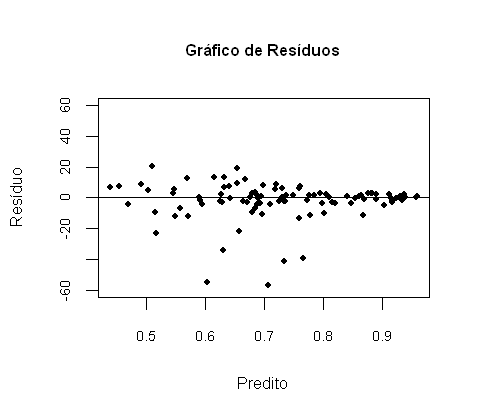

In [157]:
# GRÁFICO DE RESÍDUOS 
options(repr.plot.width = 4, repr.plot.height = 3.5)
par(cex.main = 0.8, cex.lab = 0.8, cex.axis = 0.7)
plot(resultado_admissao10$previsao_rf_best, resultado_admissao10$Residuo_Percentual, pch = 20, ylim = c(-60, 60),
     main ="Gráfico de Resíduos", xlab = "Predito", ylab = "Resíduo")
abline(h = 0)

#### MÉTRICAS - MODELO RANDOM FOREST - CROSS VALIDATION E TUNEGRID

In [158]:
metricas(resultado_admissao10$ChanceOfAdmit, resultado_admissao10$previsao_rf_best, nrow(dados_teste), 7)

Resultados do teste do Modelo:

R²      =  0.794 
Syx     =  0.0686 
Pearson =  0.8927 
RMSE    =  0.0661 
MAE     =  0.0429